In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import tabulate
import sys
import io
import seaborn as sns

sns.set_theme(style="darkgrid")

In [2]:
file_paths = [
	'./fix_data/df_2008.csv',
	'./fix_data/df_2009.csv',
	'./fix_data/df_2010.csv',
	'./fix_data/df_2011.csv',
	'./fix_data/df_2012.csv',
	'./fix_data/df_2013.csv',
	'./fix_data/df_2014.csv',
	'./fix_data/df_2015.csv',
	'./fix_data/df_2016.csv',
	'./fix_data/df_2017.csv',
	'./fix_data/df_2018.csv'
]


df_list = [pd.read_csv(file_path) for file_path in file_paths]

In [3]:
df_list[0].columns

Index(['Vehicle_Model', 'Engine_Displacement_L', 'Engine_Cylinders',
       'Transmission_Type', 'Drive', 'Fuel', 'Cert_Region', 'Underhood_Id',
       'Veh_Class', 'Air_Pollution_Score', 'City_Mpg', 'Hwy_Mpg',
       'Combined_Mpg', 'Greenhouse_Gas_Score', 'Smartway'],
      dtype='object')

In [4]:
for data in df_list:
  data['Smartway'] = data['Smartway'].apply(lambda x: 0 if x == 'No' else 1 if x == 'Yes' else 2)
  


<Axes: xlabel='Transmission_Type', ylabel='Combined_Mpg'>

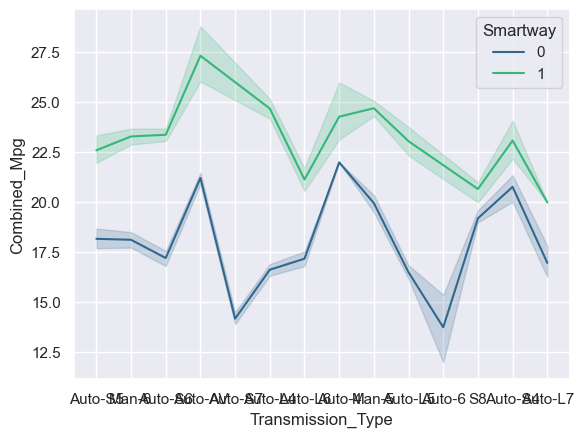

In [5]:
sns.lineplot(x=df_list[0]["Transmission_Type"], y=df_list[0]["Combined_Mpg"], hue=df_list[0]["Smartway"], palette="viridis")

In [6]:
df_list[0]["Transmission_Type"].unique()

array(['Auto-S5', 'Man-6', 'Auto-S6', 'Auto-AV', 'Auto-S7', 'Auto-L4',
       'Auto-L6', 'Auto-4', 'Man-5', 'Auto-L5', 'Auto-6', 'S8', 'Auto-S4',
       'Auto-L7'], dtype=object)

In [7]:
# df_list[0]['Transmission_Type'] = df_list[0]['Transmission_Type'].replace(['Auto-S5', 'Man-6', 'Auto-S6', 'Auto-AV', 'Auto-S7', 'Auto-L4', 'Auto-L6', 'Auto-4', 'Man-5', 'Auto-L5', 'Auto-6', 'S8', 'Auto-S4', 'Auto-L7'], ['Auto', 'Manual', 'Auto', 'Auto', 'Auto', 'Auto', 'Auto', 'Auto', 'Manual', 'Auto', 'Auto', 'Auto', 'Auto', 'Auto'])

In [8]:
df_list[0]

,Vehicle_Model,Engine_Displacement_L,Engine_Cylinders,Transmission_Type,Drive,Fuel,Cert_Region,Underhood_Id,Veh_Class,Air_Pollution_Score,City_Mpg,Hwy_Mpg,Combined_Mpg,Greenhouse_Gas_Score,Smartway
0,ACURA MDX,3.7,6,Auto-S5,4,Gasoline,CA,8HNXT03.7PKR,SUV,7.0,15,20.0,17,4,0
1,ACURA MDX,3.7,6,Auto-S5,4,Gasoline,FA,8HNXT03.7PKR,SUV,6.0,15,20.0,17,4,0
2,ACURA RDX,2.3,4,Auto-S5,4,Gasoline,CA,8HNXT02.3DKR,SUV,7.0,17,22.0,19,5,0
3,ACURA RDX,2.3,4,Auto-S5,4,Gasoline,FA,8HNXT02.3DKR,SUV,6.0,17,22.0,19,5,0
4,ACURA RL,3.5,6,Auto-S5,4,Gasoline,CA,8HNXV03.5HKR,midsize car,7.0,16,24.0,19,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2250,MITSUBISHI Raider,4.7,8,Auto-L5,4,Gas,FA,8CRXT04.7PJP,pickup,3.0,14,19.0,15,3,0
2251,NISSAN Armada,5.6,8,Auto-L5,2,Gas,FA,8NSXT05.6G9B,SUV,6.0,12,18.0,14,2,0
2252,NISSAN Armada,5.6,8,Auto-L5,4,Gas,FA,8NSXT05.6G9B,SUV,6.0,12,17.0,14,2,0
2253,NISSAN Titan,5.6,8,Auto-L5,2,Gas,FA,8NSXT05.6G9B,pickup,6.0,12,17.0,14,2,0


In [9]:
df = df_list[2]

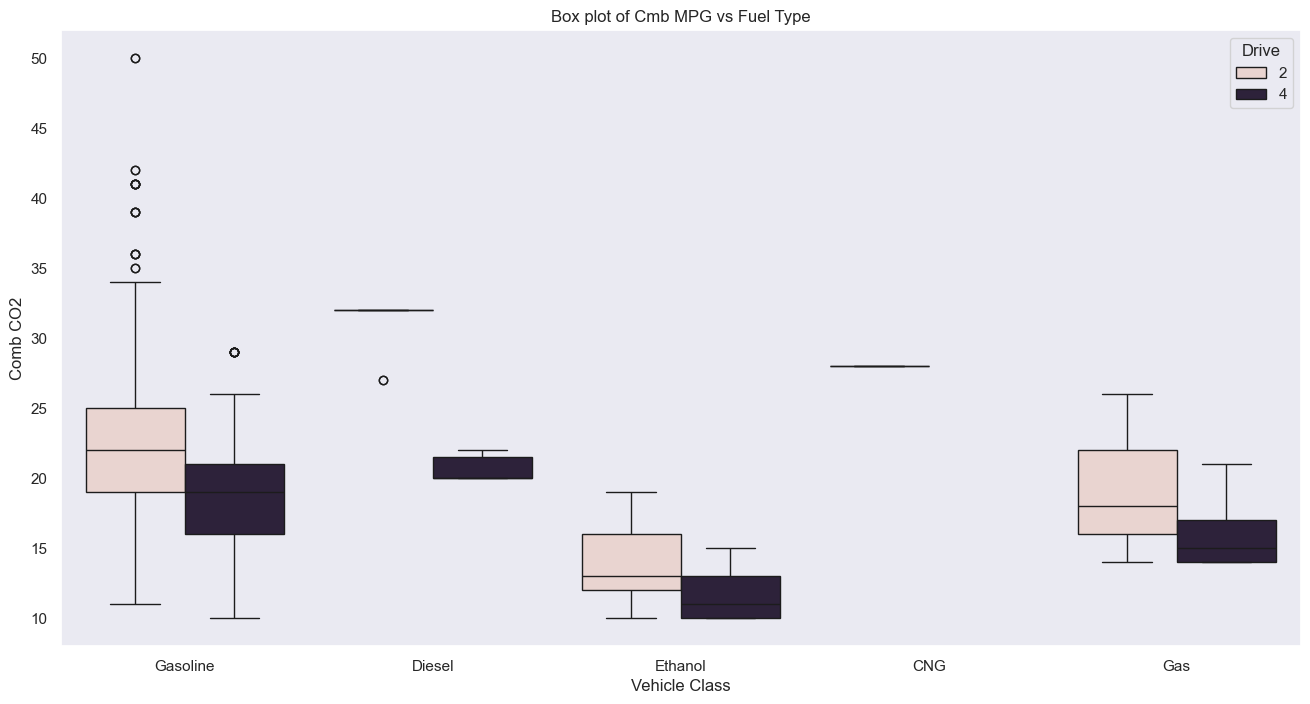

In [10]:
fig, ax = plt.subplots(figsize=(16,8))

sns.boxplot(ax=ax, data=df, x='Fuel', y='Combined_Mpg', hue='Drive')
ax.set_title('Box plot of Cmb MPG vs Fuel Type')
ax.set_xlabel('Vehicle Class')
ax.set_ylabel('Comb CO2')
ax.grid(axis='y')
ax.set_axisbelow(True);

In [11]:
e_df = df.copy()
e_df.isnull().sum()

Vehicle_Model            0
Engine_Displacement_L    0
Engine_Cylinders         0
Transmission_Type        0
Drive                    0
Fuel                     0
Cert_Region              0
Underhood_Id             0
Veh_Class                0
Air_Pollution_Score      0
City_Mpg                 0
Hwy_Mpg                  0
Combined_Mpg             0
Greenhouse_Gas_Score     0
Smartway                 0
dtype: int64

In [12]:
# e_df = e_df[e_df.isnull().any(axis=1)].reset_index(inplace=False)
e_df.drop(columns=['Engine_Displacement_L', 'Engine_Cylinders', 'Air_Pollution_Score', 'Greenhouse_Gas_Score', 'Smartway'], inplace=True)
e_df

,Vehicle_Model,Transmission_Type,Drive,Fuel,Cert_Region,Underhood_Id,Veh_Class,City_Mpg,Hwy_Mpg,Combined_Mpg
0,ACURA MDX,SemiAuto-6,4,Gasoline,CA,AHNXT03.7W19,SUV,16,21.0,18
1,ACURA MDX,SemiAuto-6,4,Gasoline,FA,AHNXT03.7W19,SUV,16,21.0,18
2,ACURA RDX,SemiAuto-5,2,Gasoline,CA,AHNXT02.3Y19,SUV,19,24.0,21
3,ACURA RDX,SemiAuto-5,4,Gasoline,CA,AHNXT02.3Y19,SUV,17,22.0,19
4,ACURA RDX,SemiAuto-5,2,Gasoline,FA,AHNXT02.3Y19,SUV,19,24.0,21
...,...,...,...,...,...,...,...,...,...,...
2234,PONTIAC G6,Auto-4,2,Gas,FC,AGMXV02.4033,small car,22,30.0,25
2235,PONTIAC G6,Auto-4,2,Gas,FC,AGMXV03.5045,small car,19,29.0,23
2236,SATURN Aura,SemiAuto-6,2,Gas,FC,AGMXV02.4033,midsize car,22,33.0,26
2237,TOYOTA Sequoia FFV,SemiAuto-6,4,Gas,FA,ATYXT05.7XE8,SUV,13,18.0,14


In [13]:
company_name = e_df['Vehicle_Model'].str.split().str[0]
model_name = [" ".join(x) for x in e_df['Vehicle_Model'].str.split().str[1:]]

e_df.drop(columns=['Vehicle_Model'], inplace=True)

e_df.insert(0, 'Company', company_name)
e_df.insert(1, 'Model', model_name)

In [14]:
e_df


,Company,Model,Transmission_Type,Drive,Fuel,Cert_Region,Underhood_Id,Veh_Class,City_Mpg,Hwy_Mpg,Combined_Mpg
0,ACURA,MDX,SemiAuto-6,4,Gasoline,CA,AHNXT03.7W19,SUV,16,21.0,18
1,ACURA,MDX,SemiAuto-6,4,Gasoline,FA,AHNXT03.7W19,SUV,16,21.0,18
2,ACURA,RDX,SemiAuto-5,2,Gasoline,CA,AHNXT02.3Y19,SUV,19,24.0,21
3,ACURA,RDX,SemiAuto-5,4,Gasoline,CA,AHNXT02.3Y19,SUV,17,22.0,19
4,ACURA,RDX,SemiAuto-5,2,Gasoline,FA,AHNXT02.3Y19,SUV,19,24.0,21
...,...,...,...,...,...,...,...,...,...,...,...
2234,PONTIAC,G6,Auto-4,2,Gas,FC,AGMXV02.4033,small car,22,30.0,25
2235,PONTIAC,G6,Auto-4,2,Gas,FC,AGMXV03.5045,small car,19,29.0,23
2236,SATURN,Aura,SemiAuto-6,2,Gas,FC,AGMXV02.4033,midsize car,22,33.0,26
2237,TOYOTA,Sequoia FFV,SemiAuto-6,4,Gas,FA,ATYXT05.7XE8,SUV,13,18.0,14


In [15]:
c_df = df.copy()
c_df.dropna(inplace=True)
c_df

,Vehicle_Model,Engine_Displacement_L,Engine_Cylinders,Transmission_Type,Drive,Fuel,Cert_Region,Underhood_Id,Veh_Class,Air_Pollution_Score,City_Mpg,Hwy_Mpg,Combined_Mpg,Greenhouse_Gas_Score,Smartway
0,ACURA MDX,3.7,6,SemiAuto-6,4,Gasoline,CA,AHNXT03.7W19,SUV,7.0,16,21.0,18,4,0
1,ACURA MDX,3.7,6,SemiAuto-6,4,Gasoline,FA,AHNXT03.7W19,SUV,6.0,16,21.0,18,4,0
2,ACURA RDX,2.3,4,SemiAuto-5,2,Gasoline,CA,AHNXT02.3Y19,SUV,7.0,19,24.0,21,5,0
3,ACURA RDX,2.3,4,SemiAuto-5,4,Gasoline,CA,AHNXT02.3Y19,SUV,7.0,17,22.0,19,4,0
4,ACURA RDX,2.3,4,SemiAuto-5,2,Gasoline,FA,AHNXT02.3Y19,SUV,6.0,19,24.0,21,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,PONTIAC G6,2.4,4,Auto-4,2,Gas,FC,AGMXV02.4033,small car,7.0,22,30.0,25,7,1
2235,PONTIAC G6,3.5,6,Auto-4,2,Gas,FC,AGMXV03.5045,small car,7.0,19,29.0,23,6,1
2236,SATURN Aura,2.4,4,SemiAuto-6,2,Gas,FC,AGMXV02.4033,midsize car,7.0,22,33.0,26,7,1
2237,TOYOTA Sequoia FFV,5.7,8,SemiAuto-6,4,Gas,FA,ATYXT05.7XE8,SUV,6.0,13,18.0,14,1,0


In [16]:
company_name = c_df['Vehicle_Model'].str.split().str[0]
model_name = [" ".join(x) for x in c_df['Vehicle_Model'].str.split().str[1:]]

c_df.drop(columns=['Vehicle_Model'], inplace=True)

c_df.insert(0, 'Company', company_name)
c_df.insert(1, 'Model', model_name)

In [17]:
c_df

,Company,Model,Engine_Displacement_L,Engine_Cylinders,Transmission_Type,Drive,Fuel,Cert_Region,Underhood_Id,Veh_Class,Air_Pollution_Score,City_Mpg,Hwy_Mpg,Combined_Mpg,Greenhouse_Gas_Score,Smartway
0,ACURA,MDX,3.7,6,SemiAuto-6,4,Gasoline,CA,AHNXT03.7W19,SUV,7.0,16,21.0,18,4,0
1,ACURA,MDX,3.7,6,SemiAuto-6,4,Gasoline,FA,AHNXT03.7W19,SUV,6.0,16,21.0,18,4,0
2,ACURA,RDX,2.3,4,SemiAuto-5,2,Gasoline,CA,AHNXT02.3Y19,SUV,7.0,19,24.0,21,5,0
3,ACURA,RDX,2.3,4,SemiAuto-5,4,Gasoline,CA,AHNXT02.3Y19,SUV,7.0,17,22.0,19,4,0
4,ACURA,RDX,2.3,4,SemiAuto-5,2,Gasoline,FA,AHNXT02.3Y19,SUV,6.0,19,24.0,21,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,PONTIAC,G6,2.4,4,Auto-4,2,Gas,FC,AGMXV02.4033,small car,7.0,22,30.0,25,7,1
2235,PONTIAC,G6,3.5,6,Auto-4,2,Gas,FC,AGMXV03.5045,small car,7.0,19,29.0,23,6,1
2236,SATURN,Aura,2.4,4,SemiAuto-6,2,Gas,FC,AGMXV02.4033,midsize car,7.0,22,33.0,26,7,1
2237,TOYOTA,Sequoia FFV,5.7,8,SemiAuto-6,4,Gas,FA,ATYXT05.7XE8,SUV,6.0,13,18.0,14,1,0


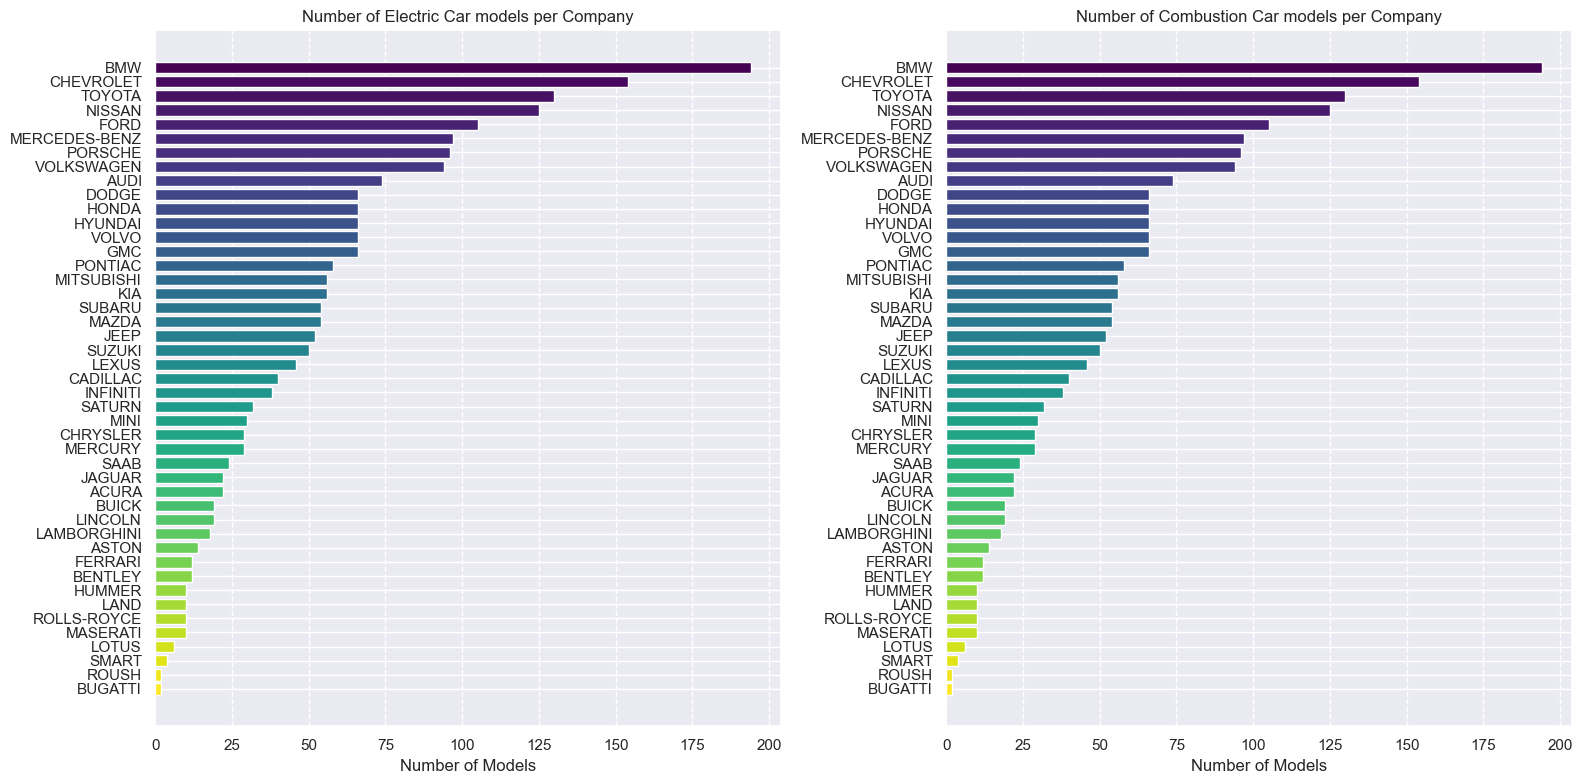

In [18]:
# Assuming 'column_to_group_by' is the column you want to group by
e_grouped_data = e_df.groupby('Company').agg({'Model': 'count'}).sort_values(by='Model', ascending=True).reset_index()

# Assuming 'column_to_group_by' is the column you want to group by
c_grouped_data = c_df.groupby('Company').agg({'Model': 'count'}).sort_values(by='Model', ascending=True).reset_index()

e_colors = plt.cm.viridis(np.linspace(0, 1, len(e_grouped_data)))
c_colors = plt.cm.viridis(np.linspace(0, 1, len(c_grouped_data)))

# Create subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Plot electric car data
ax[0].barh(e_grouped_data['Company'], e_grouped_data['Model'], color=e_colors[::-1])
ax[0].set_title("Number of Electric Car models per Company")
ax[0].set_xlabel("Number of Models")
ax[0].grid(axis='x', linestyle='--')
ax[0].set_axisbelow(True)


# Plot combustion car data
ax[1].barh(c_grouped_data['Company'], c_grouped_data['Model'], color=c_colors[::-1])
ax[1].set_title("Number of Combustion Car models per Company")
ax[1].set_xlabel("Number of Models")
ax[1].grid(axis='x', linestyle='--')
ax[1].set_axisbelow(True)


plt.tight_layout()
plt.show()

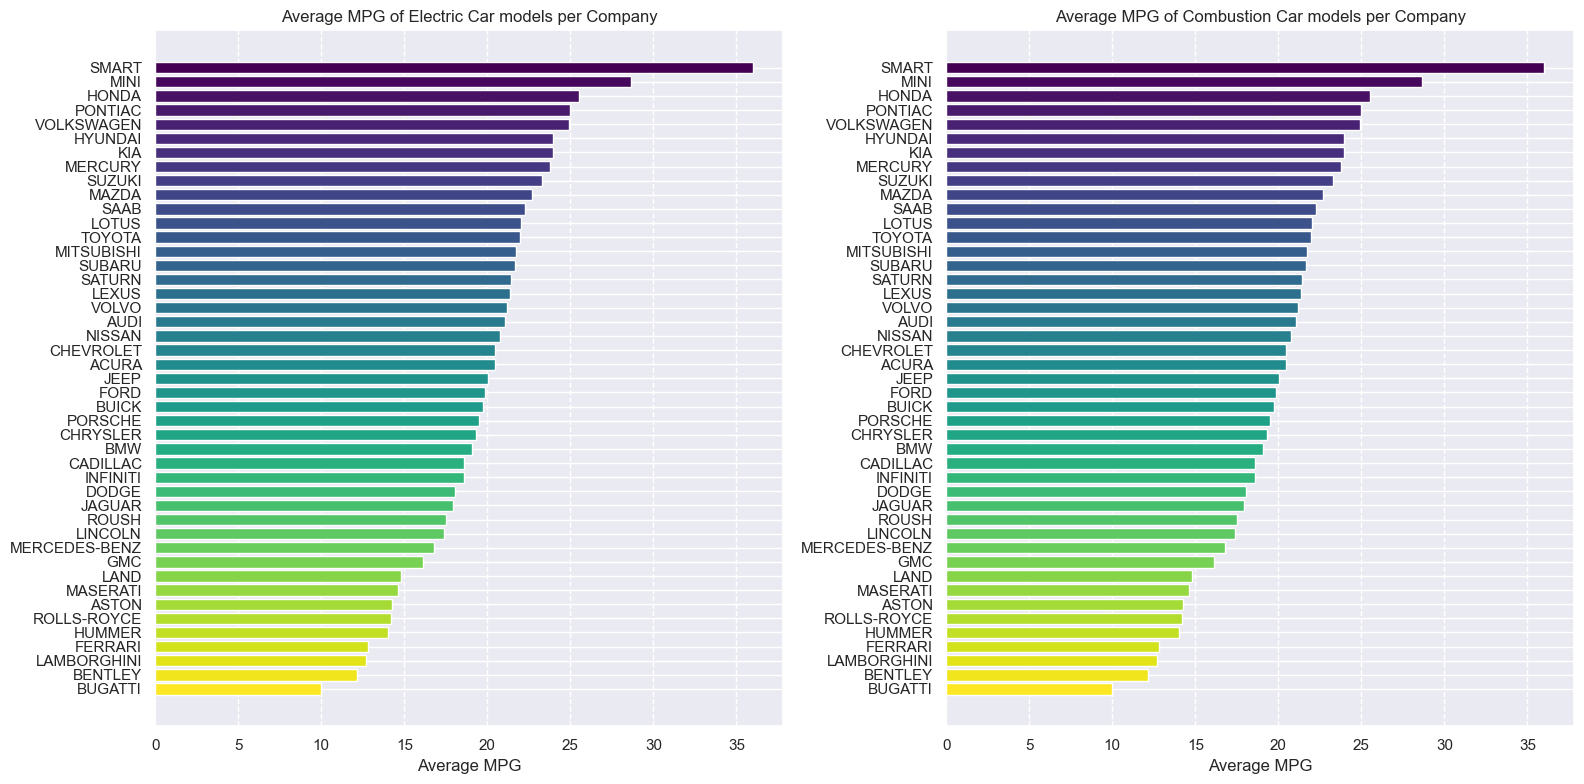

In [19]:
#  Assuming 'column_to_group_by' is the column you want to group by
e_grouped_data = e_df[['Company', 'Combined_Mpg']].groupby('Company').agg({'Combined_Mpg': 'mean'}).sort_values(by='Combined_Mpg', ascending=True).reset_index()

# Assuming 'column_to_group_by' is the column you want to group by
c_grouped_data = c_df[['Company', 'Combined_Mpg']].groupby('Company').agg({'Combined_Mpg': 'mean'}).sort_values(by='Combined_Mpg', ascending=True).reset_index()

e_colors = plt.cm.viridis(np.linspace(0, 1, len(e_grouped_data)))
c_colors = plt.cm.viridis(np.linspace(0, 1, len(c_grouped_data)))

# Create subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Plot electric car data
ax[0].barh(y=e_grouped_data['Company'], width=e_grouped_data['Combined_Mpg'], color=e_colors[::-1])
ax[0].set_title("Average MPG of Electric Car models per Company")
ax[0].set_xlabel("Average MPG")
ax[0].grid(axis='x', linestyle='--')
ax[0].set_axisbelow(True)

# Plot combustion car data
ax[1].barh(y=c_grouped_data['Company'], width=c_grouped_data['Combined_Mpg'], color=c_colors[::-1])
ax[1].set_title("Average MPG of Combustion Car models per Company")
ax[1].set_xlabel("Average MPG")
ax[1].grid(axis='x', linestyle='--')
ax[1].set_axisbelow(True)


plt.tight_layout()
plt.show()

In [20]:
def calculate_bin(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    bin_width = (2 * iqr) / (len(x) ** (1 / 3))
    bin_count = int(np.ceil((x.max() - x.min()) / bin_width))
    return bin_count

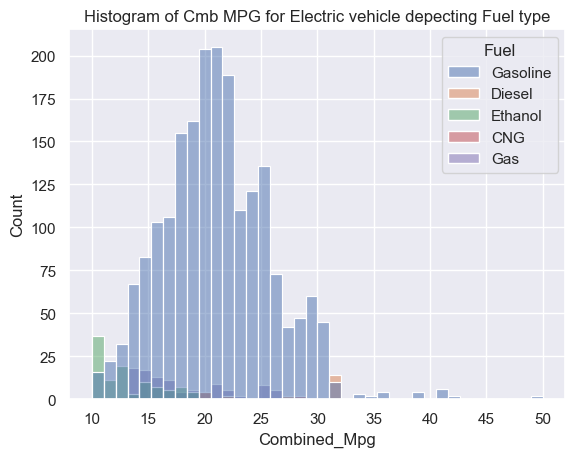

In [21]:
ax = sns.histplot(data=e_df, x="Combined_Mpg", hue='Fuel', bins=calculate_bin(e_df['Combined_Mpg']), log_scale=(False, False))
ax.set_title("Histogram of Cmb MPG for Electric vehicle depecting Fuel type");

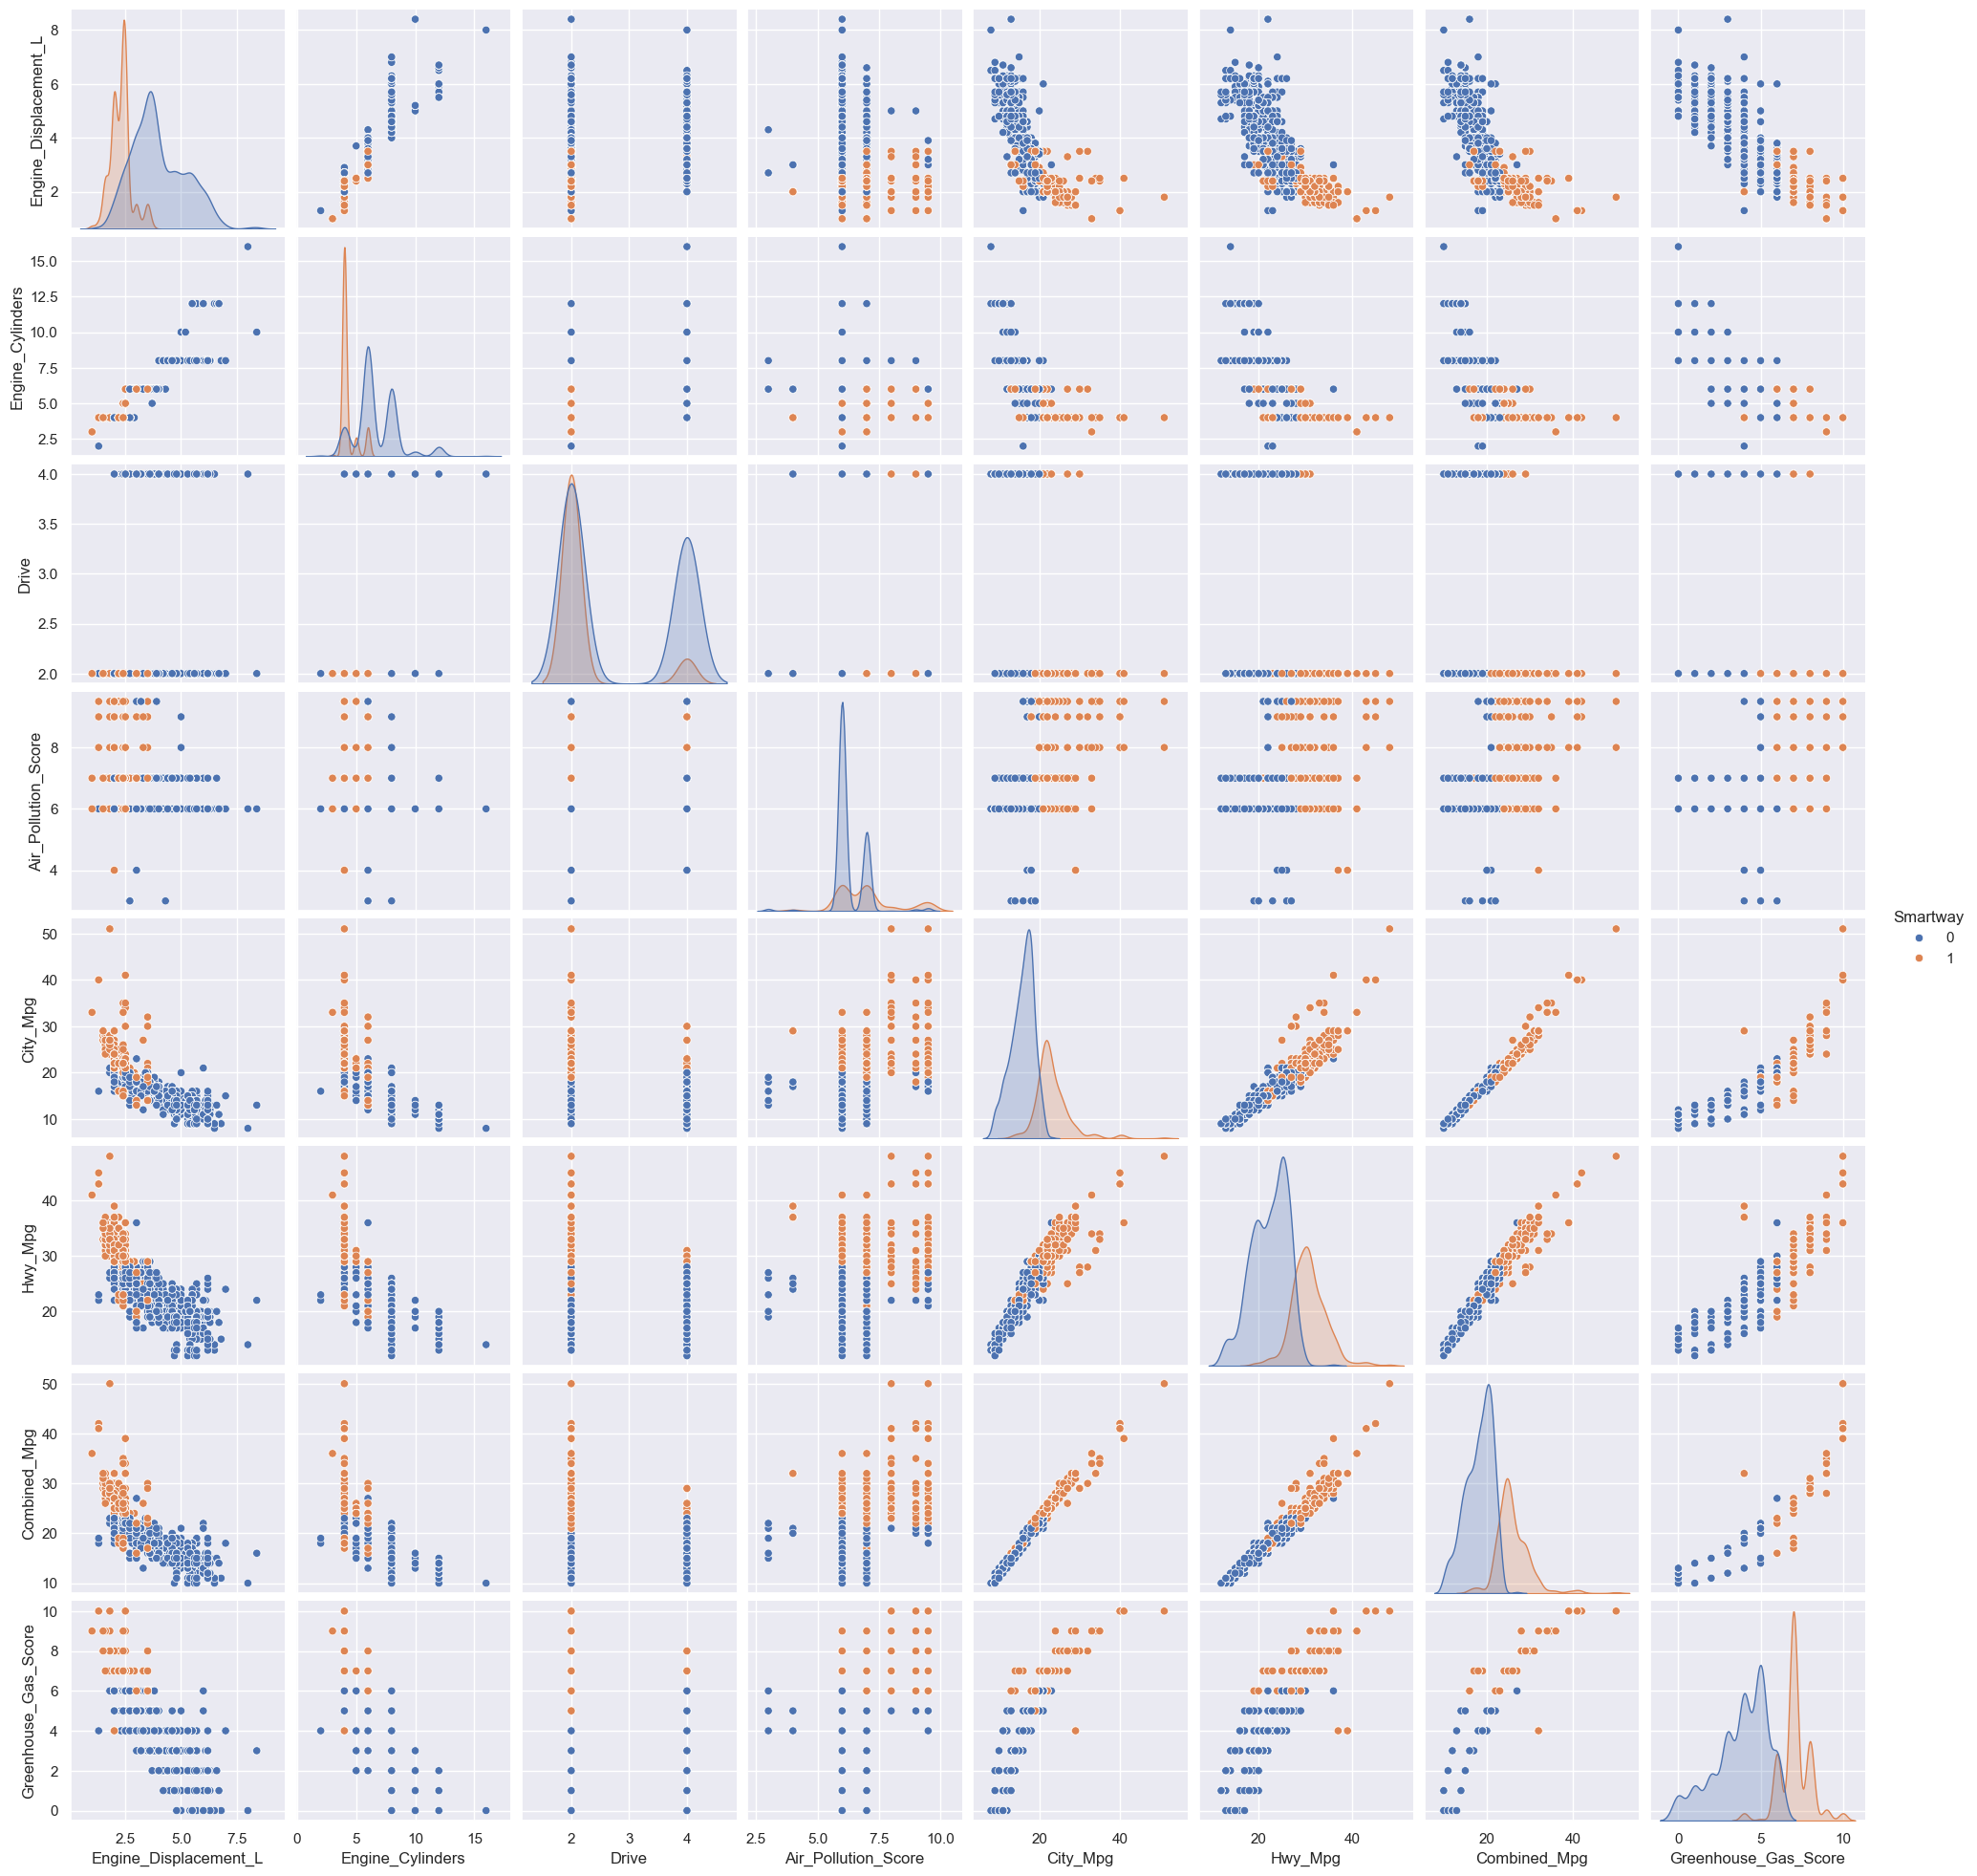

In [22]:
sns.pairplot(df, hue="Smartway")

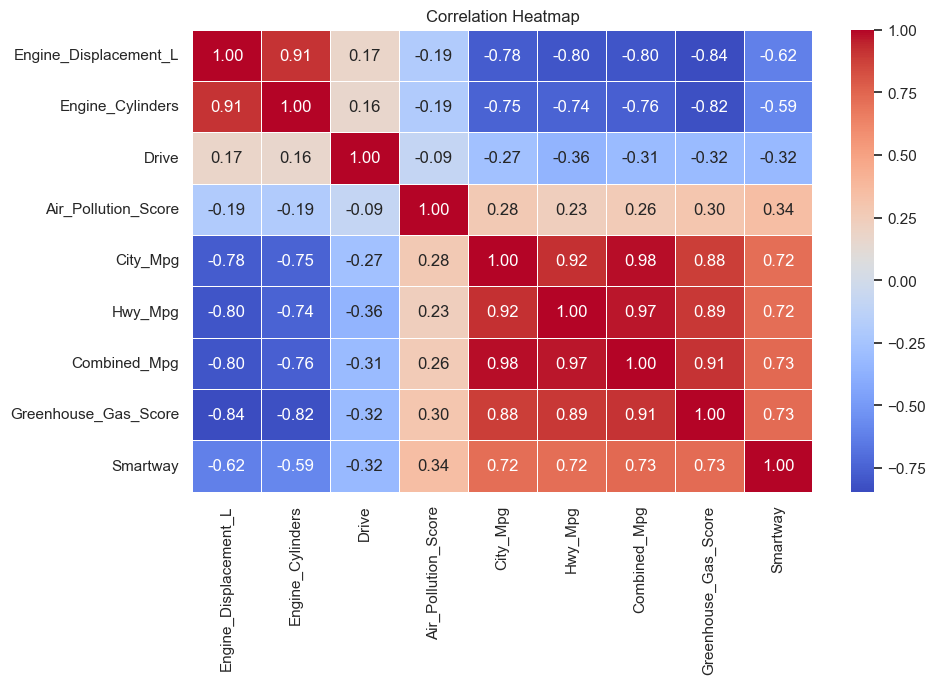

In [23]:
new = df.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(new, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()